In [2]:
import pathlib

path_root = pathlib.Path('./')
path_imgs = pathlib.Path('./processed_images')

# Carregando Imagens

In [16]:
import skimage as ski
from matplotlib import pyplot as pl
import numpy as np

imgs = []
items = []

for folder in path_imgs.iterdir():
  for item in folder.iterdir():
    items.append(item)

items = sorted(items)

for item in items:
  img = ski.io.imread(item)
  imgs.append(img)

capacitores = imgs[0:20]
diodos = imgs[20:40]
indutores = imgs[40:60]
ics = imgs[60:80]
jumpers = imgs[80:100]
leds = imgs[100:120]
potenciometros = imgs[120:140]
resistores = imgs[140:160]
switches = imgs[160:180]
transistores = imgs[180:200]


In [ ]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt 

image = imgs[125]


c = 255 / np.log(1 + np.max(image)) 
log_image = c * (np.log(image + 1)) 
inverse_log_image = (np.exp(image / c) - 1)
   
log_image = np.array(log_image, dtype = np.uint8) 
inverse_log_image = np.array(inverse_log_image, dtype = np.uint8) 
mean_image = image.copy()

N = 9
kernel = np.ones(N)/(N)
kernel = np.reshape(kernel, (3, 3))  
# print(kernel)

mean_image = cv2.filter2D(image, ddepth=-1, kernel=kernel)

mont_log = ski.util.montage([image, log_image], channel_axis=-1, grid_shape=(1, 2))
mont_exp = ski.util.montage([image, inverse_log_image], channel_axis=-1, grid_shape=(1, 2))
mont_mean = ski.util.montage([image, mean_image], channel_axis=-1, grid_shape=(1, 2))

plt.imshow(mont_log)
plt.axis('off')
plt.show() 

plt.imshow(mont_exp)
plt.axis('off')
plt.show() 

plt.imshow(mont_mean)
plt.axis('off')
plt.show() 

# Dataset Augmentation com Transformações Logaritma, Exponencial e Média

In [ ]:
import cv2
from cv2 import filter2D
import numpy as np 
import matplotlib.pyplot as plt 

N = 9
kernel = np.ones(N)/(N)
kernel = np.reshape(kernel, (3, 3))  

log_imgs = []
exp_imgs = []
mean_imgs = []

for image in imgs:
    c = 255 / np.log(1 + np.max(image)) 
    log_image = c * (np.log(image + 1)) 
    exp_image = (np.exp(image / c) - 1)
    
    log_image = np.array(log_image, dtype = np.uint8) 
    exp_image = np.array(exp_image, dtype = np.uint8) 
    mean_image = cv2.filter2D(image, ddepth=-1, kernel=kernel)
    
    log_imgs.append(log_image)
    exp_imgs.append(exp_image)
    mean_imgs.append(mean_image)


# Exibindo dataset

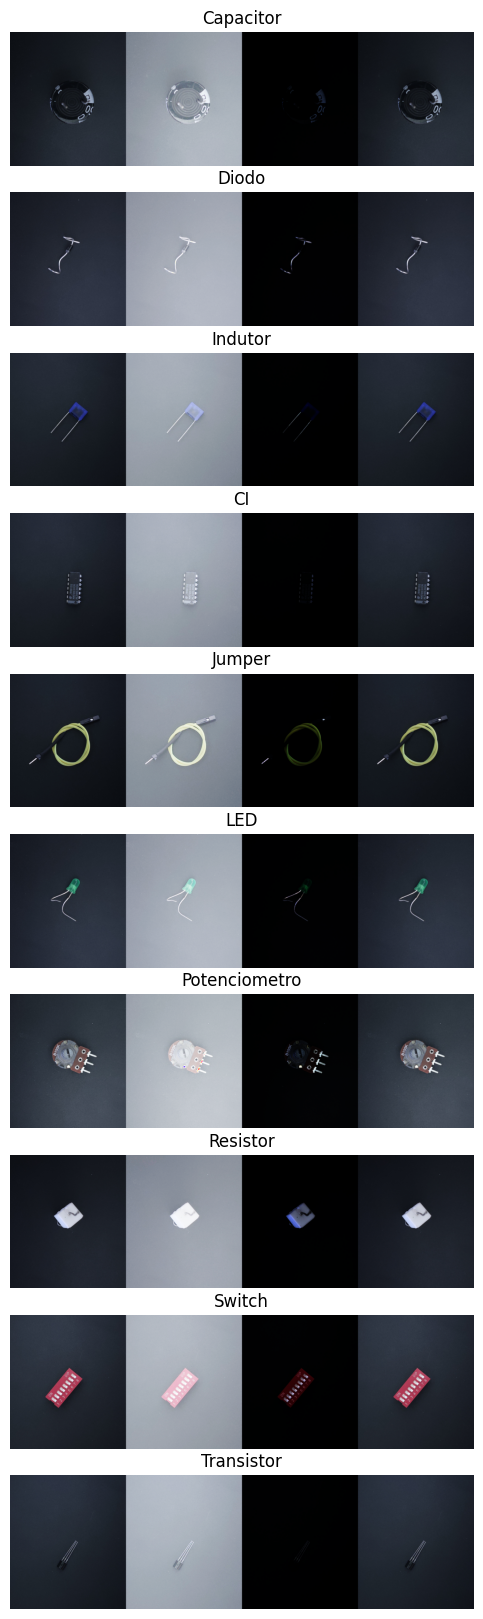

In [21]:
fig, axes = pl.subplots(10, 1, figsize=(40.96,20.48))
nomes = ['Capacitor', 'Diodo', 'Indutor', 'CI', 'Jumper', 'LED', 'Potenciometro', 'Resistor', 'Switch', 'Transistor']

for i, nome in enumerate(nomes):
    mont_augmented = ski.util.montage([imgs[i*20], log_imgs[i*20], exp_imgs[i*20], mean_imgs[i*20]], channel_axis=-1, grid_shape=(1, 4))
    axes[i].imshow(mont_augmented)
    axes[i].set_axis_off()
    axes[i].set_title(nomes[i])